<a href="https://colab.research.google.com/github/imhrishita/ML/blob/main/House-Price-Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()

In [3]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [4]:
from sklearn.model_selection import train_test_split
X_train_full,X_test,y_train_full,y_test=train_test_split(housing.data,housing.target,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full, random_state=42)

In [10]:
X_train.shape, y_train.shape

((11610, 8), (11610,))

In [9]:
X_valid.shape, y_valid.shape

((3870, 8), (3870,))

((3870, 8), (3870,))

In [7]:
X_test.shape, y_test.shape

((5160, 8), (5160,))

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

In [13]:
np.random.seed(23)
tf.random.set_seed(23)

In [17]:
model = tf.keras.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [18]:
model.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['mae'])

In [22]:
model_history=model.fit(X_train,y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.8085 - mae: 0.9525 - val_loss: 1.0780 - val_mae: 0.7096
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7804 - mae: 0.6627 - val_loss: 0.7163 - val_mae: 0.6250
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6862 - mae: 0.6160 - val_loss: 0.6438 - val_mae: 0.5885
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6353 - mae: 0.5872 - val_loss: 0.6011 - val_mae: 0.5692
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5963 - mae: 0.5693 - val_loss: 0.5599 - val_mae: 0.5454
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5633 - mae: 0.5509 - val_loss: 0.5280 - val_mae: 0.5283
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5354 - mae: 0.5353 - val_loss: 0.5007 - val_mae: 0.5159
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.

In [23]:
mae_test=model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3881 - mae: 0.4423


In [24]:
model_history.history

{'loss': [1.8084821701049805,
  0.7804022431373596,
  0.6862220168113708,
  0.6352830529212952,
  0.5963139533996582,
  0.5633382797241211,
  0.5353633165359497,
  0.5113876461982727,
  0.4921240508556366,
  0.47393378615379333,
  0.4589116871356964,
  0.4455120265483856,
  0.435467928647995,
  0.42660436034202576,
  0.41938358545303345,
  0.41336584091186523,
  0.4088760018348694,
  0.40490981936454773,
  0.40071168541908264,
  0.3976595997810364],
 'mae': [0.9524667859077454,
  0.6626631617546082,
  0.615996241569519,
  0.5872380137443542,
  0.5693410634994507,
  0.5509178638458252,
  0.5352884531021118,
  0.5216318964958191,
  0.5103168487548828,
  0.49859121441841125,
  0.49087655544281006,
  0.48229220509529114,
  0.47511327266693115,
  0.4692850410938263,
  0.4653577208518982,
  0.4610944986343384,
  0.4575583040714264,
  0.4550122916698456,
  0.45211875438690186,
  0.45017021894454956],
 'val_loss': [1.0780458450317383,
  0.7162770628929138,
  0.6437547206878662,
  0.60113853216

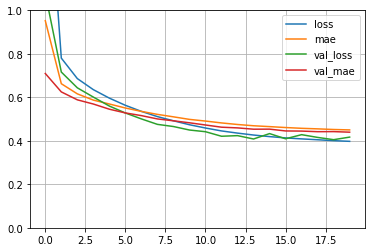

In [29]:
pd.DataFrame(model_history.history).plot(kind='line')
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [32]:
y_predict=model.predict(X_test)
y_predict,y_test

(array([[0.63421494],
        [1.7092164 ],
        [3.495289  ],
        ...,
        [1.4020184 ],
        [2.5113611 ],
        [3.8512857 ]], dtype=float32),
 array([0.477  , 0.458  , 5.00001, ..., 1.177  , 2.631  , 4.815  ]))